In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [30]:
data = pd.read_csv("bread basket.csv")
print("DataFrame shape :",data.shape)
data.head()

DataFrame shape : (20507, 5)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [45]:
# format data waktu
data ['date_time'] = pd.to_datetime(data['date_time'], format = "%d-%m-%y %H:%M")

In [7]:
data ["date_time"].dtype

dtype('<M8[ns]')

In [46]:
data["month"] = data['date_time'].dt.month
data["day"] = data['date_time'].dt.weekday
data["hour"] = data['date_time'].dt.hour
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend,month,day,hour
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,6,9
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,6,10
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,6,10


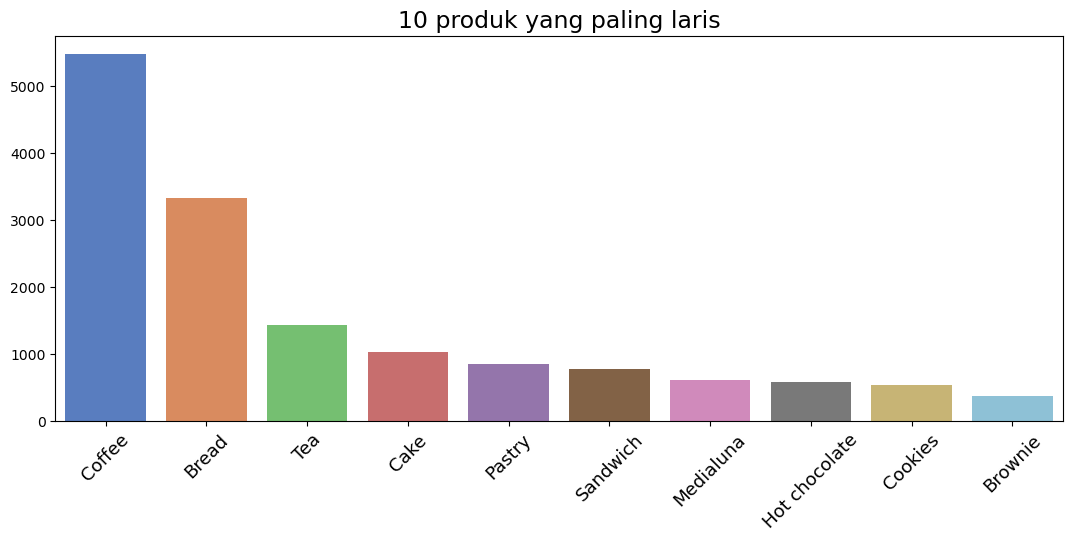

In [9]:
# menampilkan 10 item paling laris

plt.figure(figsize=(13,5))
sns.set_palette ("muted")


sns.barplot(x= data ["Item"].value_counts()[:10].index,
            y= data ["Item"].value_counts()[:10].values)
plt.xlabel("");plt.ylabel("")
plt.xticks(size = 13, rotation = 45)
plt.title('10 produk yang paling laris', size = 17)
plt.show()
          

c:\Users\salsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


Text(0.5, 1.0, 'jumlah transaksi tiap bulan dari Oktober-April')

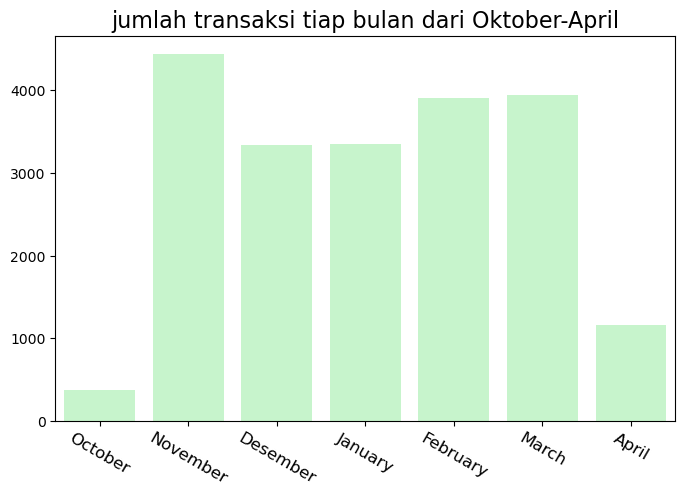

In [43]:
# transaksi tiap bulan


data_perbulan = data.groupby('month')['Transaction'].count()
data_perbulan = pd.concat([data_perbulan.iloc[4:], data_perbulan.iloc[:4]])

plt.figure(figsize= (8,5))
sns.barplot(
    x = ["October", "November", "Desember", "January", "February", "March", "April"],
    y = data_perbulan.values, color="#BFFCC6")

plt.xticks(size = 12, rotation = -30)
plt.title("jumlah transaksi tiap bulan dari Oktober-April", size =16)

c:\Users\salsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


Text(0.5, 1.0, 'jumlah transaksi tiap hari')

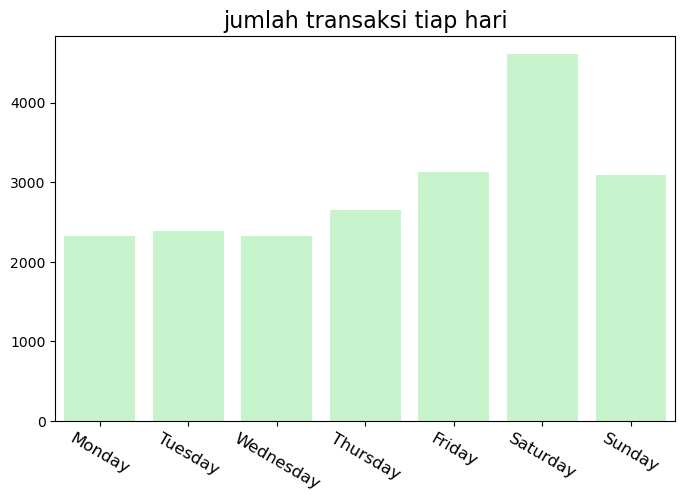

In [47]:
# transaksi tiap hari


data_perday = data.groupby('day')['Transaction'].count()


plt.figure(figsize= (8,5))
sns.barplot(
    x = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    y = data_perday.values, color="#BFFCC6")

plt.xticks(size = 12, rotation = -30)
plt.title("jumlah transaksi tiap hari", size =16)

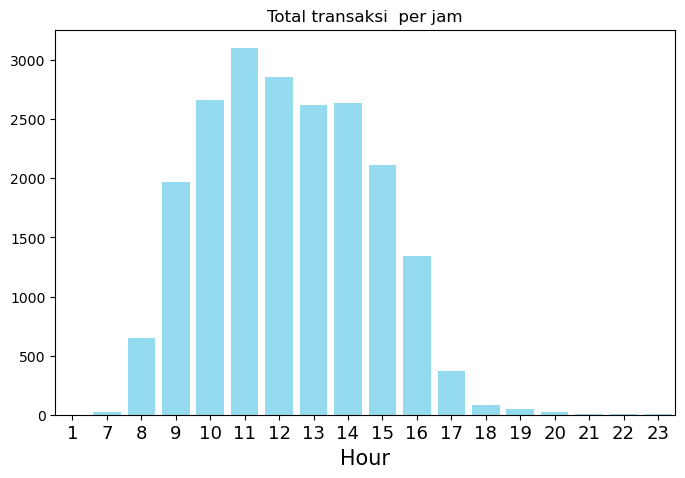

In [48]:
# transaksi tiap jam 


data_perhour = data.groupby('hour')['Transaction'].count()


plt.figure(figsize= (8,5))
sns.barplot (
    x = data_perhour.index,
    y = data_perhour.values, color= "#85E3FF")

plt.xlabel('Hour', size = 15)
plt.title("Total transaksi  per jam")
plt.xticks(size =13)
plt.show()
